### Guided Project #10: Investigating Fandango Movie Ratings

In this project, we'll analyze recent recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis as of 2015:

https://fivethirtyeight.com/features/fandango-movies-ratings/

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [4]:
import pandas as pd

before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = after[['movie', 'year', 'fandango']]

In [26]:
before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [27]:
after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [8]:
print('Shapes. Before:', before.shape, 'After:', after.shape)

Shapes. Before: (146, 5) After: (214, 3)


By reading the README.md files of the two repositories, figure out whether the two samples are representative for the population we're trying to describe.
- Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?
- Useful information can also be found in Hickey's [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).
- Dataset README.md files are available via [this link](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [this link](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)

If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

In [22]:
f_2015 = before[before['FILM'].str[-5:-1]=='2015']
f_2016 = after[after.year==2016]

In [23]:
f_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [25]:
f_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

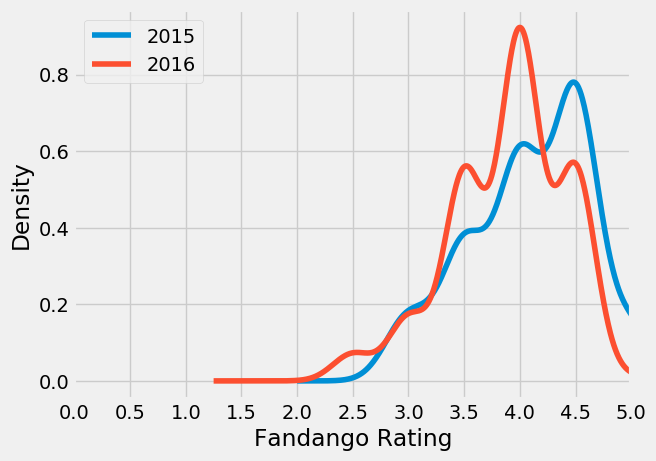

In [50]:
from matplotlib import pyplot as plt

# r for rating
r_2015 = f_2015['Fandango_Stars']
r_2016 = f_2016['fandango']

plt.style.use('fivethirtyeight')
r_2015.plot.kde(label='2015')
r_2016.plot.kde(label='2016')
plt.xlabel('Fandango Rating')
plt.xlim(2,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()

In [40]:
# resetting plt style
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

The kernel density plots show that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Examine the frequency distribution tables of the two distributions.

- The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?
- If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?

Analyze the two tables and try to answer the following questions:

- Is it still clear that there is a difference between the two distributions?
- What can you tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

In [59]:
(r_2015.value_counts()/r_2015.count()*100).sort_index()

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [60]:
(r_2016.value_counts()/r_2016.count()*100).sort_index()

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

- Compute the mean, median, and mode for each distribution.
- Compare these metrics and determine what they tell about the direction of the difference.
- What's magnitude of the difference? Is there a big difference or just a slight difference?
- Generate a grouped bar plot to show comparatively how the mean, median, and mode varied for 2015 and 2016. 

In [81]:
#m for metrics
m_2015 = pd.Series([r_2015.mean(), r_2015.median(), r_2015.mode()[0]])
m_2016 = pd.Series([r_2016.mean(), r_2016.median(), r_2016.mode()[0]])

df = pd.DataFrame([m_2015,m_2016])
df = df.T
df.columns = ['2015','2016']
df

,2015,2016
0,4.085271,3.887435
1,4.000000,4.000000
2,4.500000,4.000000


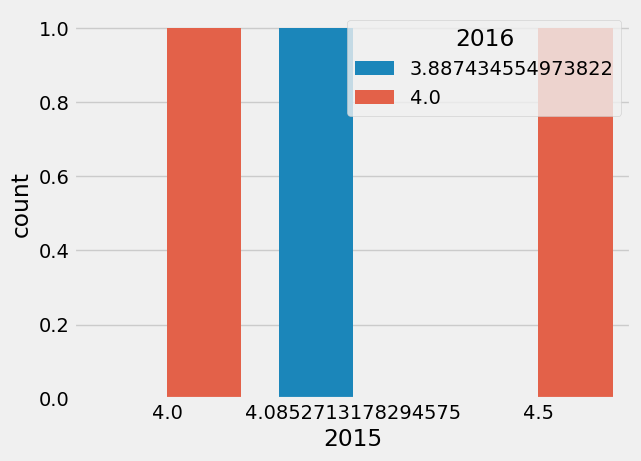

In [83]:
import seaborn as sns

sns.countplot(x='2015', hue='2016', data=df )

Apparently, we need another form of DataFrame for grouped bar plot

In [104]:
# dfg - DF for Grouped barplot
dfg = pd.DataFrame(columns=['Year','Metric','Value'])

dfg.loc[len(dfg)] = [2015, 'Mean', r_2015.mean()]
dfg.loc[len(dfg)] = [2016, 'Mean', r_2016.mean()]

dfg.loc[len(dfg)] = [2015, 'Median', r_2015.median()]
dfg.loc[len(dfg)] = [2016, 'Median', r_2016.median()]

dfg.loc[len(dfg)] = [2015, 'Mode', r_2015.mode()[0]]
dfg.loc[len(dfg)] = [2016, 'Mode', r_2016.mode()[0]]

dfg

,Year,Metric,Value
0,2015,Mean,4.085271
1,2016,Mean,3.887435
2,2015,Median,4.000000
3,2016,Median,4.000000
4,2015,Mode,4.500000
5,2016,Mode,4.000000


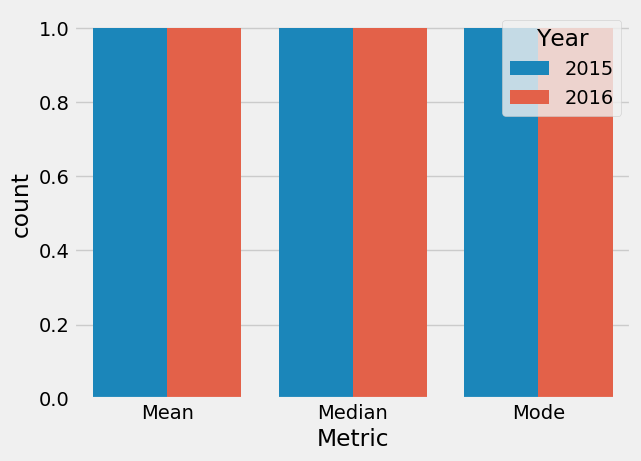

In [107]:
sns.countplot(x='Metric', hue='Year', data=dfg)

Not correct again

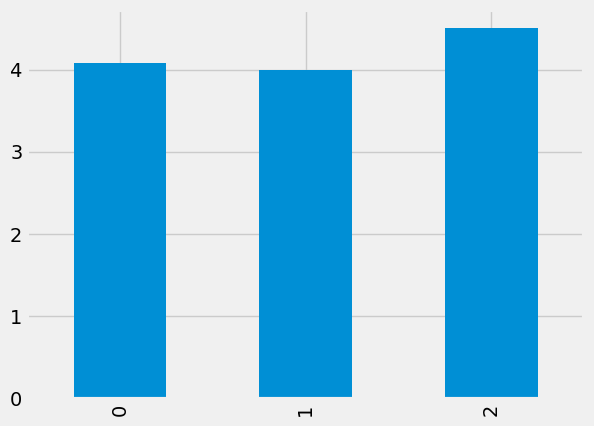

In [117]:
m_2015.plot.bar()
m_2016.plot.bar()

Going back to using df

In [121]:
df.index = ['Mean','Median','Mode']
df

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


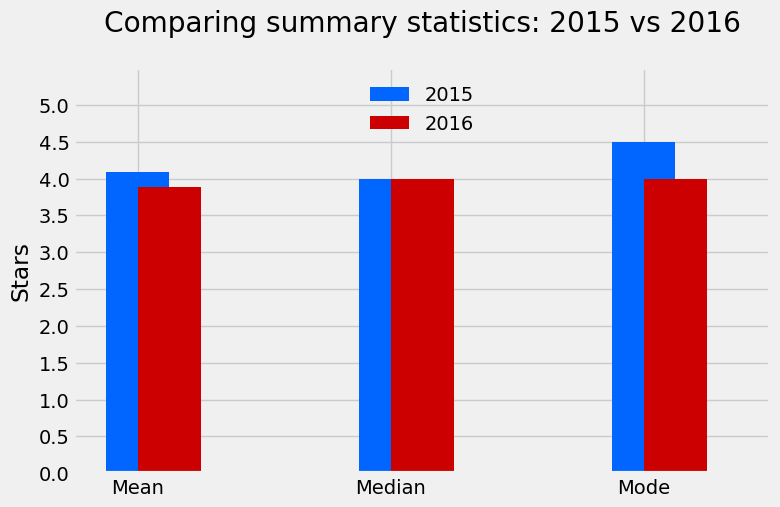

In [124]:
import numpy as np

df['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
df['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()